# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [2]:
# TODO: code and runtime results
# import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

trainidentity = pd.read_csv("/content/drive/My Drive/train_identity.csv") 
train_transaction = pd.read_csv("/content/drive/My Drive//train_transaction.csv")

Mounted at /content/drive


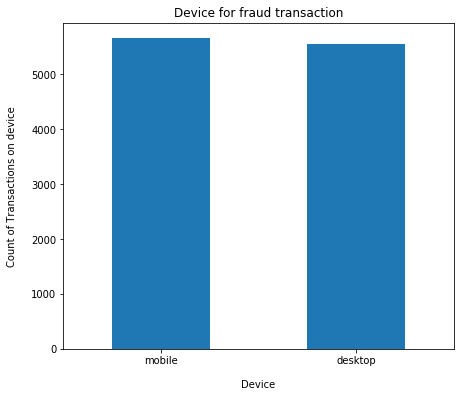

In [3]:
transactions=pd.merge( train_transaction,trainidentity, on='TransactionID', how='left')
transactions.head()


question1data=transactions[['TransactionID','DeviceType','DeviceInfo','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
question1data.head()



question1data_isFraud=transactions[['TransactionID','DeviceType','DeviceInfo','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]


##Get Fraud and Non-fraud data
question1data_fraud=question1data_isFraud.loc[question1data_isFraud['isFraud'] == 1]
question1data_Nfraud=question1data_isFraud.loc[question1data_isFraud['isFraud'] == 0]

question1data_fraud['DeviceType'].value_counts().plot(kind='bar' , figsize=(7, 6), rot=0)
                                                                                                  
plt.title("Device for fraud transaction")
                       
plt.xlabel("Device", labelpad=14)
plt.ylabel("Count of Transactions on device", labelpad=14)
plt.show()


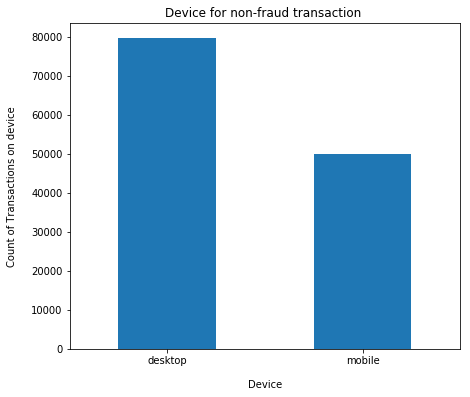

In [7]:
question1data_Nfraud['DeviceType'].value_counts().plot(kind='bar' , figsize=(7, 6), rot=0)
                                                                                                  
plt.title("Device for non-fraud transaction ")
                               
plt.xlabel("Device", labelpad=14)
plt.ylabel("Count of Transactions on device", labelpad=14)
plt.show()

Here we see that for fraud transactions, mobile devices were utilised more than the destops. There are difference between the non fraud and fraud transactions as seen in these graphs.

Text(0.5, 1.0, 'Card for fraud transaction ')

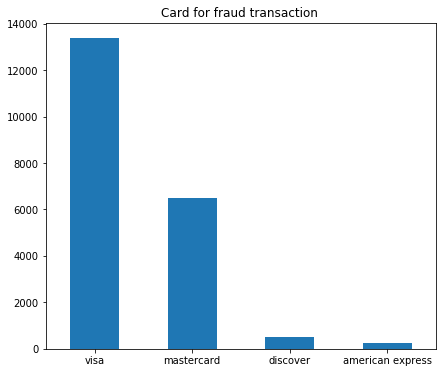

In [8]:
card4=question1data_fraud['card4']
card4.value_counts()
question1data_fraud['card4'].value_counts().plot(kind='bar' , figsize=(7, 6), rot=0);
plt.title("Card for fraud transaction ")


Text(0.5, 1.0, 'Card for non-fraud transaction ')

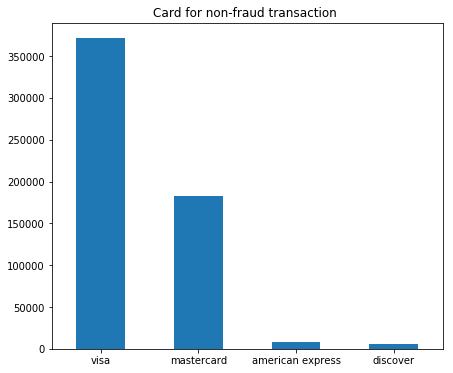

In [10]:

question1data_Nfraud['card4'].value_counts().plot(kind='bar' , figsize=(7, 6), rot=0);
plt.title("Card for non-fraud transaction ")


We also observe that the fraud transactions are more on the more used card which is visa. Both type of transactions are done more on visa cards , so they are most likely to be seen in fraud transactions

Text(0.5, 1.0, 'R_emaildomain for fraud transactions')

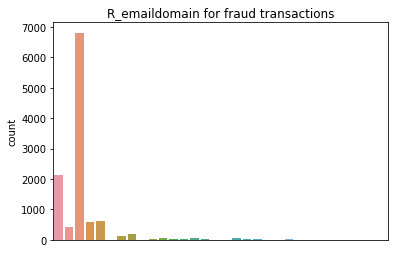

In [11]:
ax = sns.countplot(x="R_emaildomain", data=question1data_fraud)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xlabel("R_emaildomain", labelpad=14)
plt.title("R_emaildomain for fraud transactions")

R-Domain has max utilization of gmail.com domain for fraud transactions

## Part 2 - Transaction Frequency

Text(0, 0.5, 'Frequency')

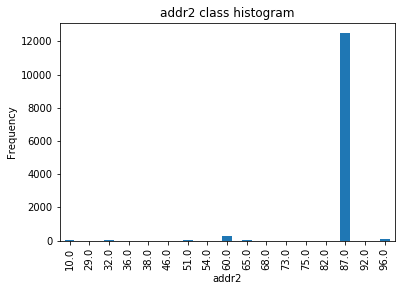

In [13]:
# TODO: code to generate the frequency graph

addr2=question1data_fraud[['addr2']]
addr2.head()


## Get the frequency of the most frequent  country code
addr2.head()
count_classes = pd.value_counts(addr2['addr2'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("addr2 class histogram")
plt.xlabel("addr2")
plt.ylabel("Frequency")



Text(0.5, 1.0, 'Frequency distribution of transactions by time for the most frequent country code')

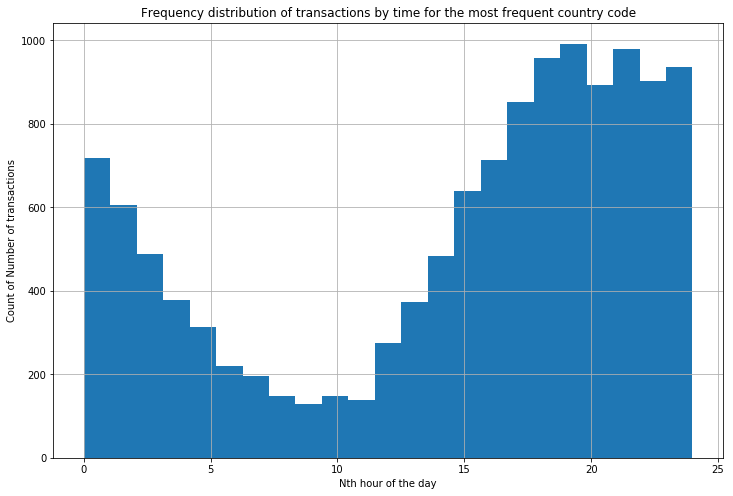

In [14]:
## Get the most frequent country code

max=addr2['addr2'].value_counts()[addr2['addr2'].value_counts() == addr2['addr2'].value_counts().max()]

maxdf=pd.DataFrame(max)
frequentofCountryCode=maxdf.iloc[0][0]

mostFrequentCountryCode=maxdf.index.values

##Get TransactionDT where addr2=mostFrequentCountryCode

countryTransactionDT=question1data_fraud.loc[question1data_fraud['addr2'] == mostFrequentCountryCode[0]]
countryTransactionDT.head()

##Get days value
days=60* 60*24
TransactionDT_days=countryTransactionDT['TransactionDT']/days
TransactionDT_daysdf=pd.DataFrame(TransactionDT_days)
TransactionDT_daysdf.columns=['TransactionDT']
TransactionDT_daysdf['TransactionDT'] = pd.Series([(val) - int(val) for val in TransactionDT_daysdf['TransactionDT']], index = TransactionDT_daysdf.index)

##Get the hour of the day
TransactionDT_hours=TransactionDT_daysdf['TransactionDT'] * 24



TransactionDT_hoursdf=pd.DataFrame(TransactionDT_hours)
TransactionDT_hoursdf.columns=['TransactionDT']


##Sort values by time of the day
TransactionDT_hoursdf = TransactionDT_hoursdf.sort_values(by =['TransactionDT'])

plt.figure(figsize=(12,8))

TransactionDT_hoursdf.head()
TransactionDT_hoursdf['TransactionDT'].hist(bins=23)

plt.xlabel('Nth hour of the day')
plt.ylabel('Count of Number of transactions')

plt.title('Frequency distribution of transactions by time for the most frequent country code')

We see that the most fraud transactions for the most frequent country code (87) are happening between 15th and 23rd hour of the day

## Part 3 - Product Code

Text(0.5, 0, 'ProductCD_cost')

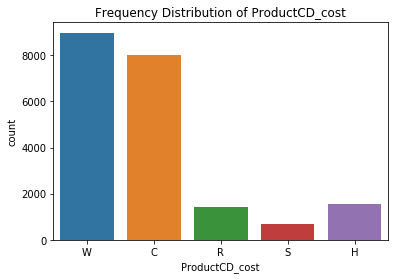

In [15]:
# TODO: code to analyze prices for different product codes


##Let us see different products available 
ProductCD_cost=question1data_fraud[['ProductCD', 'TransactionAmt']]


ax = sns.countplot(x='ProductCD', data=ProductCD_cost)
plt.title('Frequency Distribution of ProductCD_cost')
plt.xlabel('ProductCD_cost')

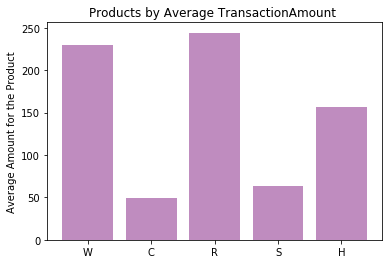

In [16]:
## Caculate the mean of the Transaction Amount for each of the product 
meanW=ProductCD_cost.loc[ProductCD_cost['ProductCD'] == 'W', 'TransactionAmt'].mean()
meanC=ProductCD_cost.loc[ProductCD_cost['ProductCD'] == 'C', 'TransactionAmt'].mean()
meanR=ProductCD_cost.loc[ProductCD_cost['ProductCD'] == 'R', 'TransactionAmt'].mean()
meanS=ProductCD_cost.loc[ProductCD_cost['ProductCD'] == 'S', 'TransactionAmt'].mean()
meanH=ProductCD_cost.loc[ProductCD_cost['ProductCD'] == 'H', 'TransactionAmt'].mean()

objects = ('W', 'C', 'R', 'S', 'H')
y_pos = np.arange(len(objects))
averageAmt = [meanW,meanC,meanR,meanS, meanH]

plt.bar(y_pos, averageAmt , align='center', alpha=0.5,color = (0.5,0.1,0.5,0.6))
plt.xticks( y_pos,objects)
plt.ylabel('Average Amount for the Product')
plt.title('Products by Average TransactionAmount ')

#ax = sns.barplot(x=objects, y=averageAmt)

plt.show()



Here we observe that the most expensive Product is Product R and most cheap product is product C. We took the average of the transaction amounts for each of the product to find the average price of product during a transaction.

## Part 4 - Correlation Coefficient

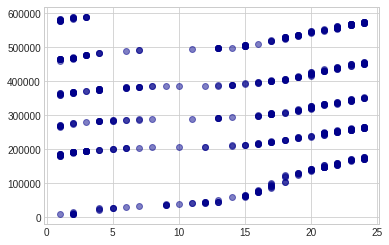

,TransactionDT,TransactionAmt
TransactionDT,1.000000,0.083589
TransactionAmt,0.083589,1.000000


In [17]:
# TODO: code to calculate correlation coefficient

#GEt the hour of each transaction 

purchaseAmountTime=question1data_fraud[['TransactionDT','TransactionAmt']]
purchaseAmountTime['TransactionDT'] = pd.Series([(val)/(60*60*24) for val in purchaseAmountTime['TransactionDT']], index = purchaseAmountTime.index)
purchaseAmountTime['TransactionDT'] = pd.Series([(val) - int(val) for val in purchaseAmountTime['TransactionDT']], index = purchaseAmountTime.index)
purchaseAmountTime['TransactionDT'] = pd.Series([(val)*24 for val in purchaseAmountTime['TransactionDT']], index = purchaseAmountTime.index)

purchaseAmountTime.TransactionDT=purchaseAmountTime.TransactionDT.apply(np.ceil)

##Sort each of the transaction
sortedTransactionDT_hoursdf=purchaseAmountTime[['TransactionDT']]
purchaseAmountTime1=purchaseAmountTime


purchaseAmountTime['TransactionAmt']=purchaseAmountTime.groupby(['TransactionDT'])["TransactionAmt"].transform('sum') .reset_index(name='variant')



##Plot the transaction

plt.style.use('seaborn-whitegrid')
plt.scatter(purchaseAmountTime[['TransactionDT']], purchaseAmountTime[['TransactionAmt']], c='DarkBlue', alpha=0.5)
plt.show()


from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr


purchaseAmountTime.corr(method ='pearson')

Pearson Coefficient is 0.083589. The plot for Transaction Amount and hour of the day is a scatter plot which is dense in the region where number of hours is greater than 15hours.

## Part 5 - Interesting Plot

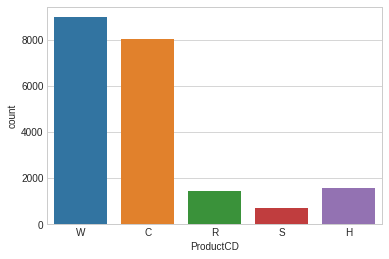

In [18]:
ax = sns.countplot(x="ProductCD", data=question1data_fraud)

The most product used during the fraud transaction  are  in the following order:


1.   W product
2.   C product
3.   R product
4.   S product
5.   H product








Text(0.5, 0, 'P_emaildomain')

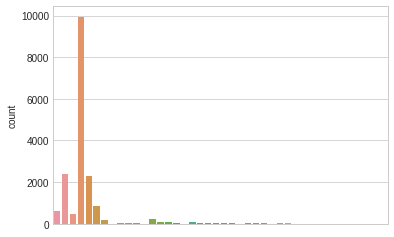

In [19]:
ax = sns.countplot(x="P_emaildomain", data=question1data_fraud)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xlabel("P_emaildomain", labelpad=14)


Most used domain for product domain is gmail as seen in the plot.

## Part 6 - Prediction Model

In [0]:
# TODO: code to generate the plot here.

# import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score


from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

## get files
train_identity = pd.read_csv("/content/drive/My Drive/train_identity.csv") 
train_transaction = pd.read_csv("/content/drive/My Drive/train_transaction.csv") 
test_transaction = pd.read_csv("/content/drive/My Drive/test_transaction.csv") 
test_identity = pd.read_csv("/content/drive/My Drive/test_identity.csv") 

##Left outer Merge  identity and transactions for training data
transactions=pd.merge( train_transaction,train_identity, on='TransactionID', how='left')
transactions_input=transactions[['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06',  'id_09', 'id_10', 'id_11', 
       'id_13', 'id_14', 'id_15',  'id_17', 'id_18', 'id_19',
       'id_20',   'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist2', 'P_emaildomain',
       'R_emaildomain']] #,   'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10',  'D12', 'D13', 'D14','D15']]

transactions_inputY=transactions[['isFraud']]
for col_name in transactions_input.columns:
    if(transactions_input[col_name].dtype == 'object'):
        transactions_input[col_name]= transactions_input[col_name].astype('category')
        transactions_input[col_name] = transactions_input[col_name].cat.codes

cat_columns = transactions_input.select_dtypes(['category']).columns
transactions_input[cat_columns] = transactions_input[cat_columns].apply(lambda x: x.cat.codes)


##Left outer Merge  identity and transactions for test data
transactions_Test=pd.merge( test_transaction,test_identity, on='TransactionID', how='left')
transactionsTest_input=transactions_Test[['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06',  'id_09', 'id_10', 'id_11', 
       'id_13', 'id_14', 'id_15',  'id_17', 'id_18', 'id_19',
       'id_20',   'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2',  'dist2', 'P_emaildomain',
       'R_emaildomain']] #,  'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10',  'D12', 'D13', 'D14', 'D15']]

for col_name in transactionsTest_input.columns:
    if(transactionsTest_input[col_name].dtype == 'object'):
        transactionsTest_input[col_name]= transactionsTest_input[col_name].astype('category')
        transactionsTest_input[col_name] = transactionsTest_input[col_name].cat.codes

cat_columns = transactionsTest_input.select_dtypes(['category']).columns
transactionsTest_input[cat_columns] = transactionsTest_input[cat_columns].apply(lambda x: x.cat.codes)

##Preprocessing
###Fill missing data with the mean
##Given the size of the data, and number of missing values we consider the Logistic Regression for classifying
transactionsTest_inputX1=transactionsTest_input.fillna(transactionsTest_input.mean())

transactions_inputX1=transactions_input.fillna(transactions_input.mean())



transactions_inputYT=transactions_inputY.transpose()




In [0]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score


##To find accuracy and compare different values of C , we split the training data
X_train, X_test, y_train, y_test = train_test_split(transactions_inputX1, transactions_inputY, test_size=0.20, random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score


logmodel = LogisticRegression(C = 0.001, penalty = 'l1', solver='liblinear')
logmodel.fit(X_train,y_train.values.ravel()  )##transactions_inputY.values.ravel())


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_testPredict=logmodel.predict(X_test)


print(classification_report(y_test,y_testPredict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113957
           1       0.25      0.00      0.00      4151

    accuracy                           0.96    118108
   macro avg       0.61      0.50      0.49    118108
weighted avg       0.94      0.96      0.95    118108



In [25]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score


logmodel = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
logmodel.fit(X_train,y_train.values.ravel()  )##transactions_inputY.values.ravel())
y_testPredict=logmodel.predict(X_test)

print(classification_report(y_test,y_testPredict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113957
           1       0.60      0.01      0.02      4151

    accuracy                           0.96    118108
   macro avg       0.78      0.51      0.50    118108
weighted avg       0.95      0.96      0.95    118108



After looking at the various values of C, we determine that C=0.01 works best and so model our data on C=0.01 for  Logistic Regression L1 regularzation




In [26]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score
from sklearn.linear_model import LogisticRegression



logmodel = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
logmodel.fit(transactions_inputX1,transactions_inputY.values.ravel()  )##transactions_inputY.values.ravel())
testPredict=logmodel.predict(transactionsTest_inputX1)


TestPredictions=pd.DataFrame(testPredict,columns=['isFraud'])
TestPredictions['isFraud'].value_counts()

TransactionID=pd.DataFrame(transactionsTest_input['TransactionID'],columns=['TransactionID'])


Predictions=pd.concat([TransactionID,TestPredictions], axis=1 ,ignore_index=True)
Predictions.head()



Predictions1=pd.DataFrame(Predictions)
Predictions1.columns=['TransactionID','isFraud']
Predictions1.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


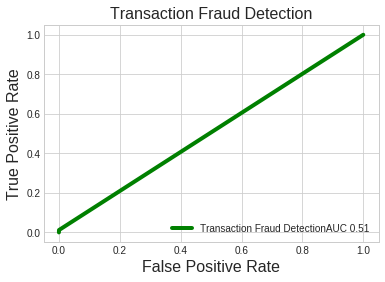

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_testPredict)
roc_auc = auc(fpr, tpr)

label = 'Transaction Fraud DetectionAUC' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Transaction Fraud Detection', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 10)

Prediction results are saved and upload on Kaggle

In [0]:
# TODO: code for your final model


Predictions1.to_csv('Predictions1.csv', index=False)
!cp Predictions1.csv drive/My\ Drive/

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link:https://www.kaggle.com/aveenakott

Highest Rank: 5777

*Score*: 0.5190

Number of entries: 1

INCLUDE IMAGE OF YOUR KAGGLE RANKING

![Rank5777](https://drive.google.com/uc?id=1yWI73gY-V0QNN7NJafmxeF8W1AZ4EHJ7)
